# Input Libary For Perform Various Task

In [1]:
#software libary
import pandas as pd

# numrical libary
import numpy as np

# visulaization libary
import seaborn as sns
import matplotlib.pyplot as plt

# remove warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import re 
import nltk 
import string
from nltk.tokenize import word_tokenize  #for text, break in word
from nltk.tokenize import sent_tokenize  #for text. break in sent
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
# by lemmetizer we found root word of given word
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from collections import Counter

In [3]:
# loaded Regression model 
from sklearn.linear_model import LogisticRegression
# laoded classifier model
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
# loaded ensemble model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
# Loaded diffrent model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [21]:
# loaded metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,balanced_accuracy_score,f1_score,precision_score
from sklearn.metrics import roc_curve, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

# Loded Data

In [6]:
# In this we have two dataset so we uplod it in csv format
df_fake=pd.read_csv('Fake.csv')
df_true=pd.read_csv('True.csv')

In [7]:
# see rows of both datasets
df_fake
df_true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [8]:
df_true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [9]:
# In this daatset we not hacve any target columns so first of all we created target value for both dataset separately
df_fake['target']= 1
df_true['target']= 0

In [10]:
# now we merge both dataset for easily understanding and perform all process equally
df=pd.concat([df_fake,df_true],axis=0)
df

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0


Now we combined our both dataset, now we stated some processing on our dataset

In [11]:
# check shape of dataset
df.shape

(44898, 5)

In our datset we have 44898 rows and 5 columns

In [12]:
# Getting information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


for our dataset we have some information i.e.
1. In our dataset we have 44898 rows and 5 columns.
2. 1 target columns Out of 5 is int type except 4.
3. No null values are not present in iour dataset.

In [13]:
# columns of our adset
df.columns

Index(['title', 'text', 'subject', 'date', 'target'], dtype='object')

In [14]:
# Check null values
df.isnull().any()

title      False
text       False
subject    False
date       False
target     False
dtype: bool

There is no null values are present in dataset, so we now check white spaces in dataset

In [15]:
df=df.replace(" ",np.nan)  #check white space in datset

In [16]:
# Check white spaces in dataset
df.isnull().sum()

title        0
text       627
subject      0
date         0
target       0
dtype: int64

In our dataset 627 white spaces are available in text columns

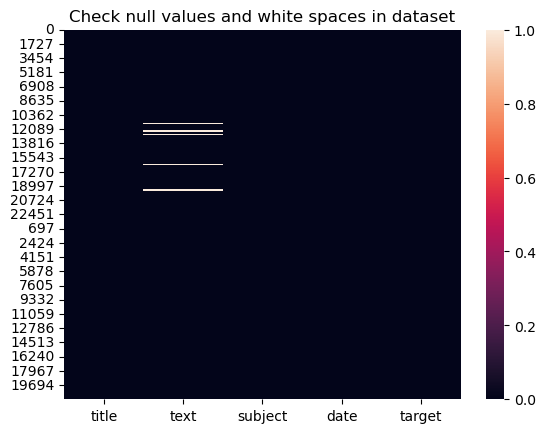

In [17]:
# check null values by visulaization 
sns.heatmap(df.isnull())
plt.title('Check null values and white spaces in dataset')
plt.show()

We easily see our white spaces in dataset, we handle later

# Pre-Processing

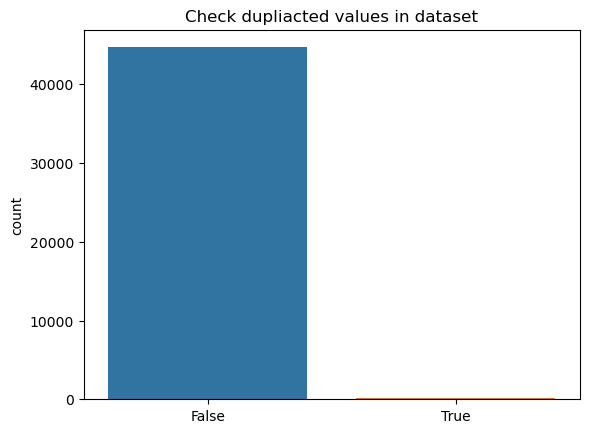

False    44689
True       209
dtype: int64

In [18]:
# find dupliacted values
sns.countplot(df.duplicated())
plt.title('Check dupliacted values in dataset')
plt.show()
# count number of duplicated values
df.duplicated().value_counts()


there are 209 duplicated values so we remove it

In [19]:
# remove duplicated values from dataset
df=df.drop_duplicates(keep='first')
df.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [20]:
# after remove dupliactes values check once more time
df.duplicated().value_counts()

False    44689
dtype: int64

Now no more duplicated values are not in our dataset

In [21]:
# check unique values in dataset
df.nunique().to_frame('No of Unique values in dataset')

,No of Unique values in dataset
title,38729
text,38645
subject,8
date,2397
target,2


In subject and date number of unique values is less and it looks like not useful for us  so we remove it during data cleaning process

In [22]:
# check how much % of null value in text
print("Null values in text columns",100-(df.shape[0]-df['text'].isnull().sum())*100/df.shape[0])

Null values in text columns 1.403029828369398


As we know date every data is important for us so we fill it 

In [23]:
# check mode value in text columns for fill null values in this column
df['text'].mode()

0                                                     
1    AP News  The regulars amble in before dawn and...
2    Because there wouldn t be any outrage over a  ...
3                                               Enjoy:
4    On September 15, Hillary  apparently  held a r...
5    Things didn t go as well as Nicholle had hoped...
Name: text, dtype: object

as we see that it is difficult to manage this bcoz we have 5 unique values in dataset, so we drop null values

# Data Cleaning

In [24]:
# remove null values from text columns
df.dropna(subset=['text'], axis=0, inplace=True)

In [25]:
# check null values after remove 
df.isnull().sum()

title      0
text       0
subject    0
date       0
target     0
dtype: int64

In [26]:
# here in dataset som enot useful columns so we removed it
df.drop(['subject','date'],inplace=True, axis=1)

In [27]:
df

,title,text,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,1
...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,0


In [28]:
# Now merger both columns title and text for better results
df['total_text']=df['title'] + df['text']
df.head()

,title,text,target,total_text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,1,Donald Trump Sends Out Embarrassing New Year’...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,1,Drunk Bragging Trump Staffer Started Russian ...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",1,Sheriff David Clarke Becomes An Internet Joke...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",1,Trump Is So Obsessed He Even Has Obama’s Name...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,1,Pope Francis Just Called Out Donald Trump Dur...


In [29]:
# Now remove both column title and text after merge
df=df.drop(['title','text'], axis=1)
df.head()

,target,total_text
0,1,Donald Trump Sends Out Embarrassing New Year’...
1,1,Drunk Bragging Trump Staffer Started Russian ...
2,1,Sheriff David Clarke Becomes An Internet Joke...
3,1,Trump Is So Obsessed He Even Has Obama’s Name...
4,1,Pope Francis Just Called Out Donald Trump Dur...


# Explatory Data Analysis

In [30]:
df.head()

,target,total_text
0,1,Donald Trump Sends Out Embarrassing New Year’...
1,1,Drunk Bragging Trump Staffer Started Russian ...
2,1,Sheriff David Clarke Becomes An Internet Joke...
3,1,Trump Is So Obsessed He Even Has Obama’s Name...
4,1,Pope Francis Just Called Out Donald Trump Dur...


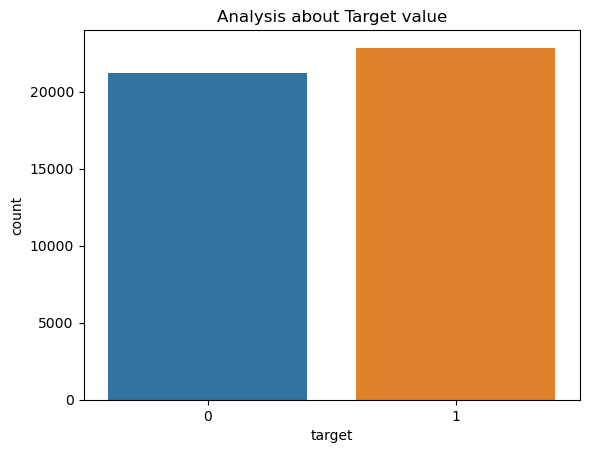

1    22852
0    21210
Name: target, dtype: int64

In [31]:
# visulzization about target values
sns.countplot(df['target'])
plt.title('Analysis about Target value')   #title of visulaization
plt.show()   #show visulaization

# counts target columns values
df['target'].value_counts()

There is no more diffrences in both values 0 and 1 , it look like equally distributed 

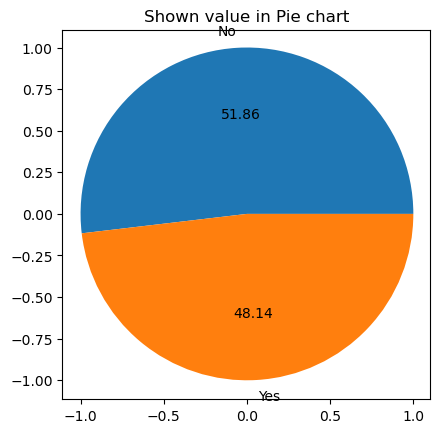

In [32]:
#pie plot for value count of target
# check target column role
plt.pie(df['target'].value_counts(),labels=['No','Yes'],autopct='%0.2f', frame=True)
plt.title('Shown value in Pie chart')
plt.show()

In [33]:
# Check individual percentage of each variable in taregt
df_fake= (df['target'].value_counts()[0] /df.shape[0])*100
print("The percentage of fake news is",df_fake,'%')
print('\n')
df_true= (df['target'].value_counts()[1] /df.shape[0])*100
print("The percentage of true news is",df_true,'%')

The percentage of fake news is 48.136716445009306 %


The percentage of true news is 51.863283554990694 %


In [34]:
# Check len of total text
df['text_length']=df['total_text'].apply(len)
df.head()

,target,total_text,text_length
0,1,Donald Trump Sends Out Embarrassing New Year’...,2972
1,1,Drunk Bragging Trump Staffer Started Russian ...,1967
2,1,Sheriff David Clarke Becomes An Internet Joke...,3687
3,1,Trump Is So Obsessed He Even Has Obama’s Name...,2852
4,1,Pope Francis Just Called Out Donald Trump Dur...,2416


In [35]:
# Now check length of total word
df['word_length']= df['total_text'].apply(lambda x: len(word_tokenize(x)))
df.head()

,target,total_text,text_length,word_length
0,1,Donald Trump Sends Out Embarrassing New Year’...,2972,613
1,1,Drunk Bragging Trump Staffer Started Russian ...,1967,338
2,1,Sheriff David Clarke Becomes An Internet Joke...,3687,706
3,1,Trump Is So Obsessed He Even Has Obama’s Name...,2852,537
4,1,Pope Francis Just Called Out Donald Trump Dur...,2416,468


In [36]:
#now check in text hoiw much sentences
df['sentense_length']=df['total_text'].apply( lambda x: len(sent_tokenize(x)))
df.head()

,target,total_text,text_length,word_length,sentense_length
0,1,Donald Trump Sends Out Embarrassing New Year’...,2972,613,26
1,1,Drunk Bragging Trump Staffer Started Russian ...,1967,338,11
2,1,Sheriff David Clarke Becomes An Internet Joke...,3687,706,25
3,1,Trump Is So Obsessed He Even Has Obama’s Name...,2852,537,15
4,1,Pope Francis Just Called Out Donald Trump Dur...,2416,468,19


## Summary of Statistic

In [37]:
df.describe()  #Statistic summary of dataset

,target,text_length,word_length,sentense_length
count,44062.000000,44062.000000,44062.000000,44062.000000
mean,0.518633,2582.178589,473.423767,15.124325
std,0.499658,2170.093838,394.405571,12.586652
min,0.000000,61.000000,5.000000,1.000000
25%,0.000000,1372.000000,250.000000,7.000000
50%,1.000000,2286.000000,420.000000,13.000000
75%,1.000000,3204.000000,590.000000,20.000000
max,1.000000,51892.000000,9969.000000,321.000000


Here we do some analysis about dataset of diffrent length

1. As we seen that in our dataset 75% and max index gap is high it mean in our dataset outliers are present.
2. As we seen that inj our dataset mean > meadin its mean here right side skewness is present.

## Correlation between dataset

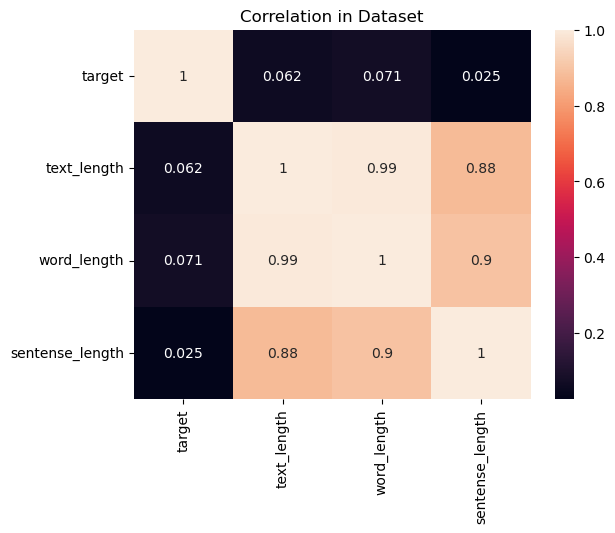

In [38]:
# check correlation in dataset
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation in Dataset')
plt.show()

1. text_length column is correlated in negatiev manner with -6.2%.
2. word_length column is correlated in negatiev manner with -7.1%.
3. sentense_length column is correlated in negatiev manner with -2.5%.
 
The word_length  show good relation with target, so we do analyasis on word base

# NLP Processing

In [81]:
# define a text for where we input our text msg and mail for ckeck it is spam and no
def text_nlp(text):
    #first of all we convert all the text into lower case.for better understanding for python
    text=text.lower()
    #After lower text we apply tokenize text into separated word
    text=nltk.word_tokenize(text)
    
    #Now create empty list for remove sign type data like $%^&**()
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    #now we remove punctuation from text after apply all these method
    punc=[]
    for i in y:
            if i not in string.punctuation:
                punc.append(i)
    #now removing stopping word from dictionary from stopwords.words('english')
    stopword=[]
    for i in punc:
         if i not in stopwords.words('english'):
                stopword.append(i)
    #now remove root word varient like cook-->cooked,cooking,cooks etc        
    lemme=[]
    for i in stopword:
         lemme.append(WordNetLemmatizer().lemmatize(i))
    #after all these process we join all with a suitable space between word    
    return " ".join(lemme)
            

In [40]:
# now we send our data mail columns into define text_nlp(text) and create a new variable column text nlp after apply all this process
df['text_nlp']=df['total_text'].apply(text_nlp)
df.head()

,target,total_text,text_length,word_length,sentense_length,text_nlp
0,1,Donald Trump Sends Out Embarrassing New Year’...,2972,613,26,donald trump sends embarrassing new year eve m...
1,1,Drunk Bragging Trump Staffer Started Russian ...,1967,338,11,drunk bragging trump staffer started russian c...
2,1,Sheriff David Clarke Becomes An Internet Joke...,3687,706,25,sheriff david clarke becomes internet joke thr...
3,1,Trump Is So Obsessed He Even Has Obama’s Name...,2852,537,15,trump obsessed even obama name coded website i...
4,1,Pope Francis Just Called Out Donald Trump Dur...,2416,468,19,pope francis called donald trump christmas spe...


In [41]:
# Check legth after apply nlp process in new column clean_length
df['cleaned_lenth']= df['text_nlp'].apply(lambda x: len(x))
df.head()

,target,total_text,text_length,word_length,sentense_length,text_nlp,cleaned_lenth
0,1,Donald Trump Sends Out Embarrassing New Year’...,2972,613,26,donald trump sends embarrassing new year eve m...,1912
1,1,Drunk Bragging Trump Staffer Started Russian ...,1967,338,11,drunk bragging trump staffer started russian c...,1334
2,1,Sheriff David Clarke Becomes An Internet Joke...,3687,706,25,sheriff david clarke becomes internet joke thr...,2296
3,1,Trump Is So Obsessed He Even Has Obama’s Name...,2852,537,15,trump obsessed even obama name coded website i...,1711
4,1,Pope Francis Just Called Out Donald Trump Dur...,2416,468,19,pope francis called donald trump christmas spe...,1452


In [43]:
# Defining a function to replace some of the contracted words to their full form and removing urls and some unwanted text 
def decontracted(text):
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don’t", "do not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"im ", "i am", text)
    text = re.sub(r"yo ", "you ",text)
    text = re.sub(r"doesn’t", "does not",text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    #text = re.sub(r"", " ", text)
    text = re.sub(r'[^\w\d\s]', ' ', text)
    text = re.sub(r'http\S+', '', text) # Removing urls
    return text

In [44]:
# now apply regex expression decontracted wordson text nlp coliumns
df['Total_text'] = df['text_nlp'].apply(lambda x : decontracted(x))
df.head()

,target,total_text,text_length,word_length,sentense_length,text_nlp,cleaned_lenth,Total_text
0,1,Donald Trump Sends Out Embarrassing New Year’...,2972,613,26,donald trump sends embarrassing new year eve m...,1912,donald trump sends embarrassing new year eve m...
1,1,Drunk Bragging Trump Staffer Started Russian ...,1967,338,11,drunk bragging trump staffer started russian c...,1334,drunk bragging trump staffer started russian c...
2,1,Sheriff David Clarke Becomes An Internet Joke...,3687,706,25,sheriff david clarke becomes internet joke thr...,2296,sheriff david clarke becomes internet joke thr...
3,1,Trump Is So Obsessed He Even Has Obama’s Name...,2852,537,15,trump obsessed even obama name coded website i...,1711,trump obsessed even obama name coded website i...
4,1,Pope Francis Just Called Out Donald Trump Dur...,2416,468,19,pope francis called donald trump christmas spe...,1452,pope francis called donald trump christmas spe...


In [45]:
# Length check after removing expression of diffrent type
df['final_length']= df['Total_text'].apply(lambda x: len(x))
df.head()

,target,total_text,text_length,word_length,sentense_length,text_nlp,cleaned_lenth,Total_text,final_length
0,1,Donald Trump Sends Out Embarrassing New Year’...,2972,613,26,donald trump sends embarrassing new year eve m...,1912,donald trump sends embarrassing new year eve m...,1912
1,1,Drunk Bragging Trump Staffer Started Russian ...,1967,338,11,drunk bragging trump staffer started russian c...,1334,drunk bragging trump staffer started russian c...,1334
2,1,Sheriff David Clarke Becomes An Internet Joke...,3687,706,25,sheriff david clarke becomes internet joke thr...,2296,sheriff david clarke becomes internet joke thr...,2297
3,1,Trump Is So Obsessed He Even Has Obama’s Name...,2852,537,15,trump obsessed even obama name coded website i...,1711,trump obsessed even obama name coded website i...,1712
4,1,Pope Francis Just Called Out Donald Trump Dur...,2416,468,19,pope francis called donald trump christmas spe...,1452,pope francis called donald trump christmas spe...,1452


When we apply regex expression on our dataset then some  changes are occur. These changes are seen in row no 2, 3 etc.
Now our dataset are free from all misleading elements.

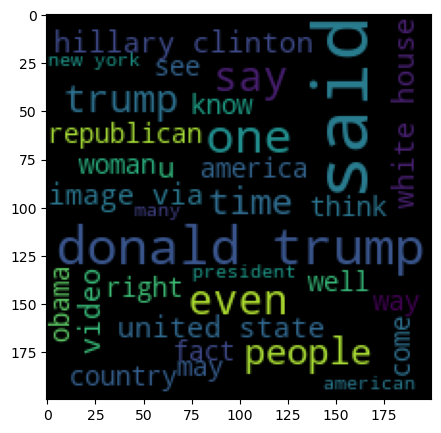

In [46]:
# check most common word in formate from is in total text no 
wc=WordCloud(width=200, height=200,min_font_size=10,background_color='black')
fake_wc=wc.generate(df[df['target']==1]['Total_text'].str.cat(sep=" "))
plt.figure(figsize=(12,5))
plt.imshow(fake_wc)
plt.show()

Which words are coming in fake news most common

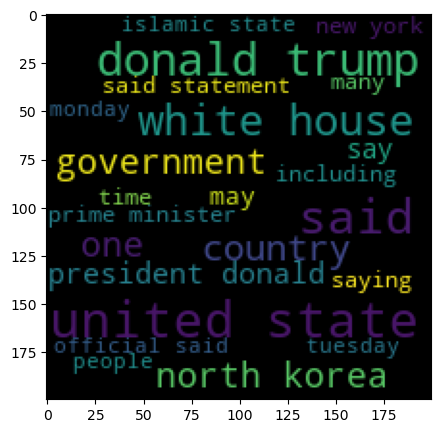

In [47]:
# check most common word in formate from is in total text no 
wc=WordCloud(width=200, height=200,min_font_size=10,background_color='black')
fake_wc=wc.generate(df[df['target']==0]['Total_text'].str.cat(sep=" "))
plt.figure(figsize=(12,5))
plt.imshow(fake_wc)
plt.show()

Which type of words are coming in true news most common

In [48]:
# now creat a list of split word in count
count=[]
for i in df[df['target']==1]['Total_text'].tolist():
    for news in i.split():
        count.append(news)

In [49]:
# check len of fake news txt
len(count)

5512426

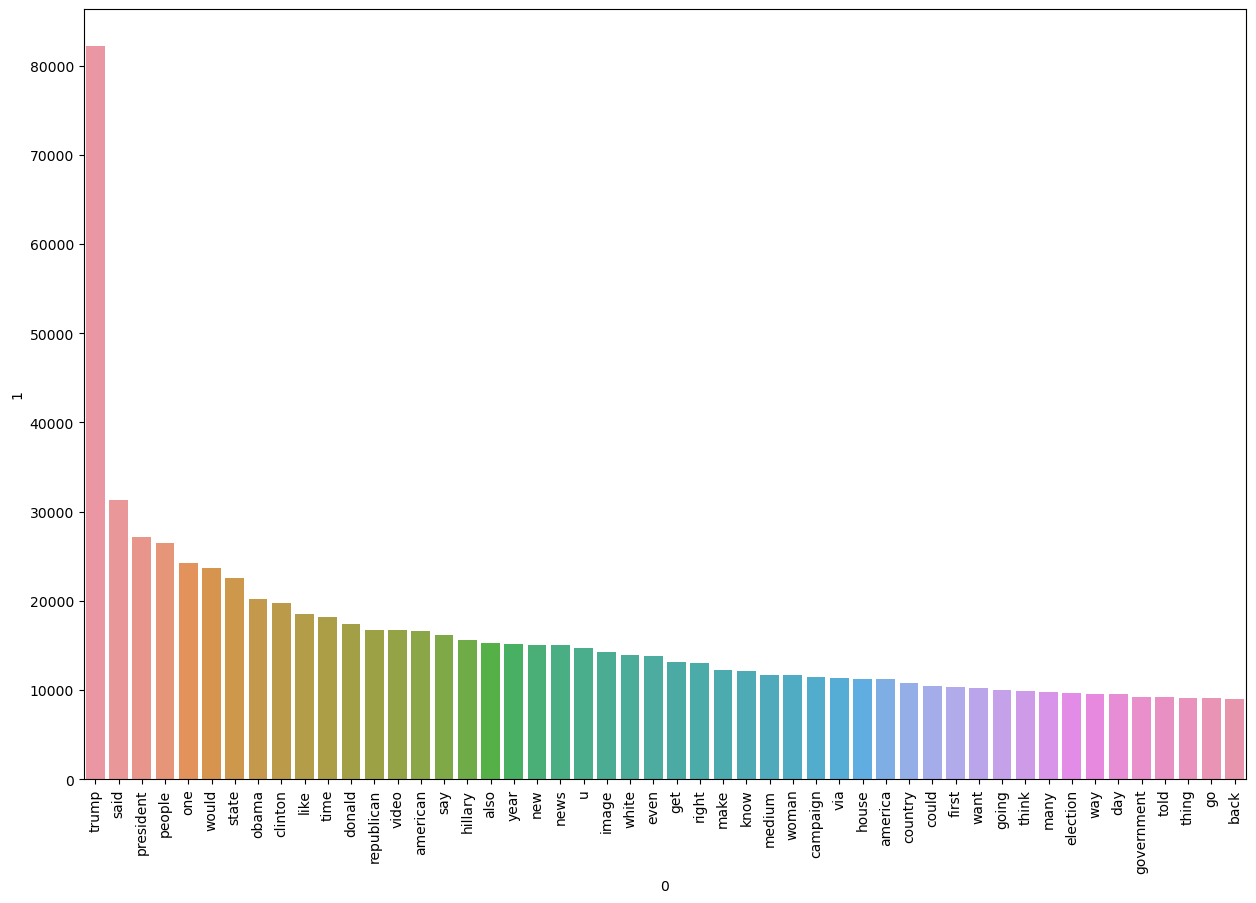

In [50]:
# now see msg is spam most common word
plt.figure(figsize=(15,10))
sns.barplot(pd.DataFrame(Counter(count).most_common(50))[0],pd.DataFrame(Counter(count).most_common(50))[1])
plt.xticks(rotation='vertical')
plt.show()

By this chart we see that when- when fake news are comong then donald trumph name is used on large scale  in fake  news

In [51]:
# Now create a count_tuee for true news
count_true=[]
for i in df[df['target']==0]['Total_text'].tolist():
    for new in i.split():
        count_true.append(new)

In [52]:
len(count_true)

4853438

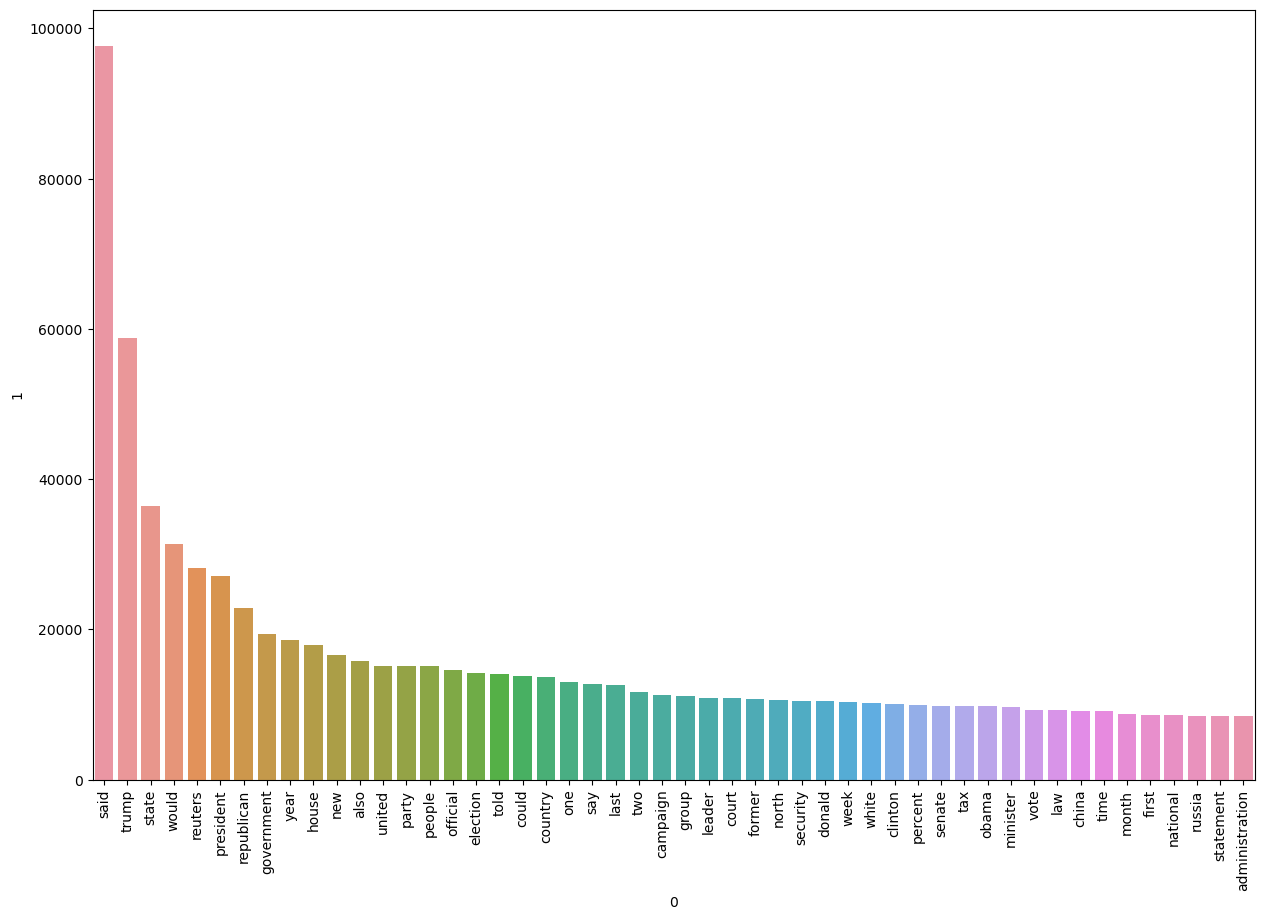

In [53]:
plt.figure(figsize=(15,10))
sns.barplot(pd.DataFrame(Counter(count_true).most_common(50))[0],pd.DataFrame(Counter(count_true).most_common(50))[1])
plt.xticks(rotation='vertical')
plt.show()

In true news most common word is said after this trumph is coming

# Save Data Table For Avoiding Run Cell from Starting

In [61]:
# due to come some probelms during working on this  so i save it as fake_news_pre file name for save my time and work
df.to_csv('fake_news_pre.csv')

# Loaded The Save File Fake_news_pre.csv

In [6]:
# load save fake _news_pre file
ds=pd.read_csv('fake_news_pre')
ds.head()

,Unnamed: 0,target,total_text,text_length,word_length,sentense_length,text_nlp,cleaned_lenth,Total_text,final_length
0,0,1,Donald Trump Sends Out Embarrassing New Year’...,2972,613,26,donald trump sends embarrassing new year eve m...,1912,donald trump sends embarrassing new year eve m...,1912
1,1,1,Drunk Bragging Trump Staffer Started Russian ...,1967,338,11,drunk bragging trump staffer started russian c...,1334,drunk bragging trump staffer started russian c...,1334
2,2,1,Sheriff David Clarke Becomes An Internet Joke...,3687,706,25,sheriff david clarke becomes internet joke thr...,2296,sheriff david clarke becomes internet joke thr...,2297
3,3,1,Trump Is So Obsessed He Even Has Obama’s Name...,2852,537,15,trump obsessed even obama name coded website i...,1711,trump obsessed even obama name coded website i...,1712
4,4,1,Pope Francis Just Called Out Donald Trump Dur...,2416,468,19,pope francis called donald trump christmas spe...,1452,pope francis called donald trump christmas spe...,1452


# Vectorize Data

In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [8]:
# convert text into array form for undestand for model
cv=CountVectorizer()
tfid=TfidfVectorizer(max_features=2000,stop_words='english', analyzer='word')
X=tfid.fit_transform(ds['Total_text'],).toarray()

In [9]:
len(X)

44062

In [10]:
# removing unbalancing problem in target columns
ds['target'].value_counts()

1    22852
0    21210
Name: target, dtype: int64

In our datset target variable have no more diffrence so we don't need to apply SMOTE method

# Apply MIN-MAX scaler

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
st=MinMaxScaler()
x=st.fit_transform(X)
x

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.16351252, ..., 0.        , 0.        ,
        0.        ]])

In [13]:
y=ds.target

In [14]:
# y= ds[['target']]

In [15]:
# x=pd.DataFrame(x)

# Now our target variable both are equal, so we Now apply model

In [16]:
# Creating instances for different Classifiers
LO=LogisticRegression()
MU=MultinomialNB()
GB=GaussianNB()
BN=BernoulliNB()
DTC = DecisionTreeClassifier()
KN=KNeighborsClassifier()
AD=AdaBoostClassifier()
GR=GradientBoostingClassifier()
RF = RandomForestClassifier()

# Creating a list model where all the models will be appended for further evaluation in loop.
models=[]
models.append(('LogisticRegression',LO))
models.append(('MultinomialNB',MU))
models.append(('GaussianNB',GB))
models.append(('Bernoulli',BN))
models.append(('DecisionTreeClassifier',DTC))
models.append(('KneighborsClassifier',KN))
models.append(('AdaBoostClassifier',AD))
models.append(('GradientBoostingClassifier',GR))
models.append(('RandomForestClassifier',RF))

****************************** LogisticRegression ******************************
The maximum accuracy score of LogisticRegression is 0.9938156028368794 is achieved at 20


Accuracy_Score:  99.23404255319149
Accuracy Score of Model  : 99.6028293679313
AUC_Score: 99.23565384362422
Model_with Dataset: 99.6028293679313
Cross Validation Score:  98.80168049108734
Precision Score: 99.32922806245877


Confusion matrix: 

[[8457   61]
 [  74 9033]]


Classification Report:
 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8518
           1       0.99      0.99      0.99      9107

    accuracy                           0.99     17625
   macro avg       0.99      0.99      0.99     17625
weighted avg       0.99      0.99      0.99     17625



<Figure size 500x500 with 0 Axes>

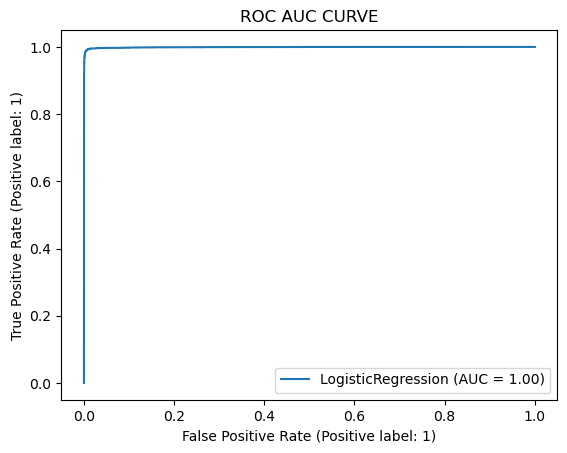





****************************** MultinomialNB ******************************
The maximum accuracy score of MultinomialNB is 0.939177304964539 is achieved at 23


Accuracy_Score:  93.39007092198581
Accuracy Score of Model  : 93.69822597117677
AUC_Score: 93.3965376235929
Model_with Dataset: 93.69822597117677
Cross Validation Score:  90.91272904473693
Precision Score: 93.95616559663493


Confusion matrix: 

[[7972  546]
 [ 619 8488]]


Classification Report:
 
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      8518
           1       0.94      0.93      0.94      9107

    accuracy                           0.93     17625
   macro avg       0.93      0.93      0.93     17625
weighted avg       0.93      0.93      0.93     17625



<Figure size 500x500 with 0 Axes>

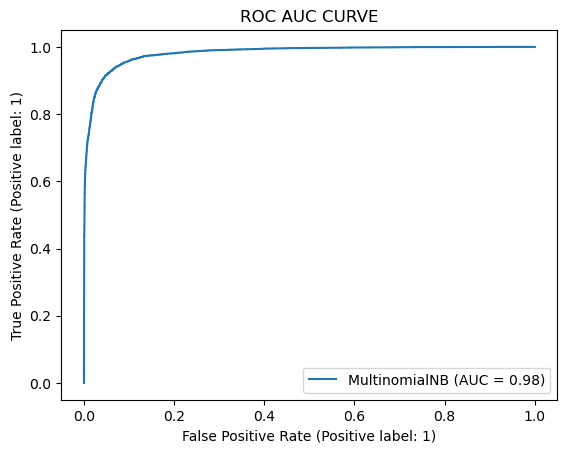





****************************** GaussianNB ******************************
The maximum accuracy score of GaussianNB is 0.9138156028368795 is achieved at 33


Accuracy_Score:  90.93900709219858
Accuracy Score of Model  : 91.56485229035064
AUC_Score: 90.88540771681272
Model_with Dataset: 91.56485229035064
Cross Validation Score:  86.80722016576944
Precision Score: 90.22065124250214


Confusion matrix: 

[[7605  913]
 [ 684 8423]]


Classification Report:
 
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      8518
           1       0.90      0.92      0.91      9107

    accuracy                           0.91     17625
   macro avg       0.91      0.91      0.91     17625
weighted avg       0.91      0.91      0.91     17625



<Figure size 500x500 with 0 Axes>

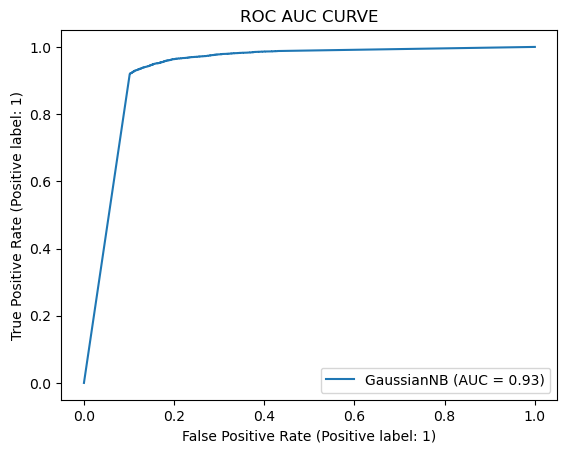





****************************** Bernoulli ******************************
The maximum accuracy score of Bernoulli is 0.9637446808510638 is achieved at 33


Accuracy_Score:  96.09645390070922
Accuracy Score of Model  : 96.25524832620947
AUC_Score: 96.0879135336887
Model_with Dataset: 96.25524832620947
Cross Validation Score:  94.10594436611743
Precision Score: 96.11129367948297


Confusion matrix: 

[[8163  355]
 [ 333 8774]]


Classification Report:
 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      8518
           1       0.96      0.96      0.96      9107

    accuracy                           0.96     17625
   macro avg       0.96      0.96      0.96     17625
weighted avg       0.96      0.96      0.96     17625



<Figure size 500x500 with 0 Axes>

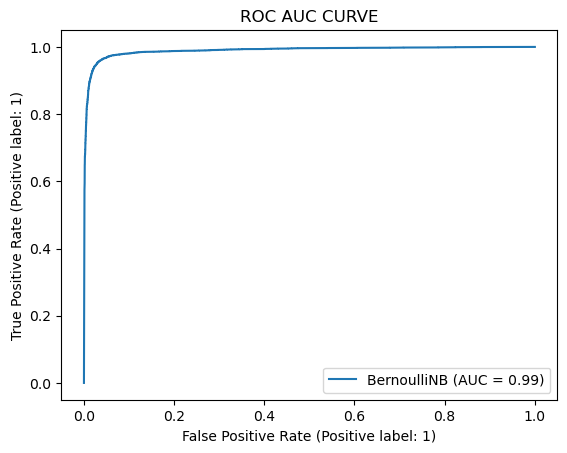





****************************** DecisionTreeClassifier ******************************
The maximum accuracy score of DecisionTreeClassifier is 0.9941560283687944 is achieved at 30


Accuracy_Score:  99.24539007092199
Accuracy Score of Model  : 100.0
AUC_Score: 99.24245836454355
Model_with Dataset: 100.0
Cross Validation Score:  99.00141457351694
Precision Score: 99.21035314762008


Confusion matrix: 

[[8446   72]
 [  61 9046]]


Classification Report:
 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8518
           1       0.99      0.99      0.99      9107

    accuracy                           0.99     17625
   macro avg       0.99      0.99      0.99     17625
weighted avg       0.99      0.99      0.99     17625



<Figure size 500x500 with 0 Axes>

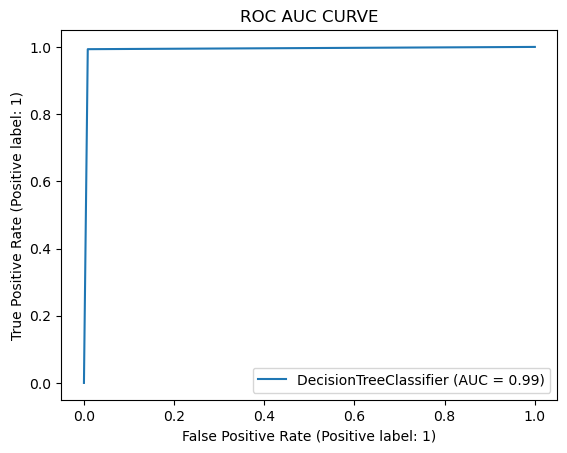





****************************** KneighborsClassifier ******************************
The maximum accuracy score of KneighborsClassifier is 0.8765957446808511 is achieved at 25


Accuracy_Score:  86.75177304964538
Accuracy Score of Model  : 90.99368309566138
AUC_Score: 86.69804785984313
Model_with Dataset: 90.99368309566138
Cross Validation Score:  80.38687715229416
Precision Score: 86.36168384879726


Confusion matrix: 

[[7248 1270]
 [1065 8042]]


Classification Report:
 
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      8518
           1       0.86      0.88      0.87      9107

    accuracy                           0.87     17625
   macro avg       0.87      0.87      0.87     17625
weighted avg       0.87      0.87      0.87     17625



<Figure size 500x500 with 0 Axes>

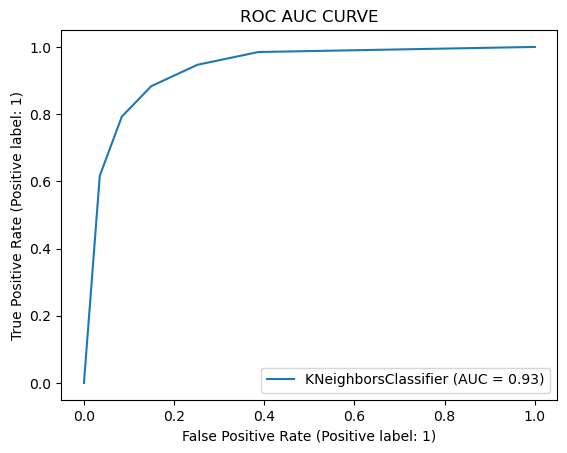





****************************** AdaBoostClassifier ******************************
The maximum accuracy score of AdaBoostClassifier is 0.9952340425531915 is achieved at 22


Accuracy_Score:  99.43262411347517
Accuracy Score of Model  : 99.52339524151756
AUC_Score: 99.43616580760529
Model_with Dataset: 99.52339524151756
Cross Validation Score:  99.26466874467778
Precision Score: 99.57072096862962


Confusion matrix: 

[[8479   39]
 [  61 9046]]


Classification Report:
 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8518
           1       1.00      0.99      0.99      9107

    accuracy                           0.99     17625
   macro avg       0.99      0.99      0.99     17625
weighted avg       0.99      0.99      0.99     17625



<Figure size 500x500 with 0 Axes>

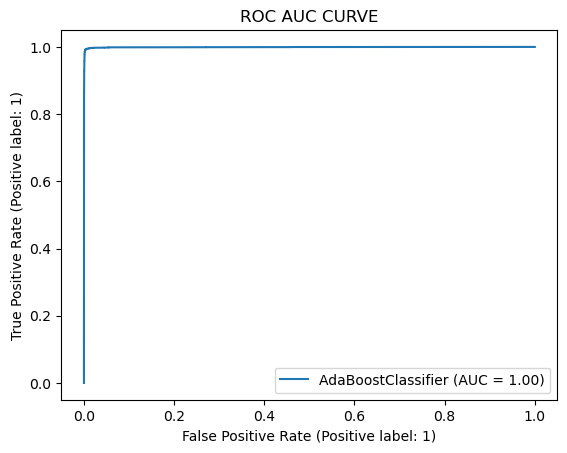





****************************** GradientBoostingClassifier ******************************
The maximum accuracy score of GradientBoostingClassifier is 0.9955177304964539 is achieved at 37


Accuracy_Score:  99.39290780141845
Accuracy Score of Model  : 99.76926277565533
AUC_Score: 99.39811347251828
Model_with Dataset: 99.76926277565533
Cross Validation Score:  99.34182954770267
Precision Score: 99.58131335390038


Confusion matrix: 

[[8480   38]
 [  69 9038]]


Classification Report:
 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8518
           1       1.00      0.99      0.99      9107

    accuracy                           0.99     17625
   macro avg       0.99      0.99      0.99     17625
weighted avg       0.99      0.99      0.99     17625



<Figure size 500x500 with 0 Axes>

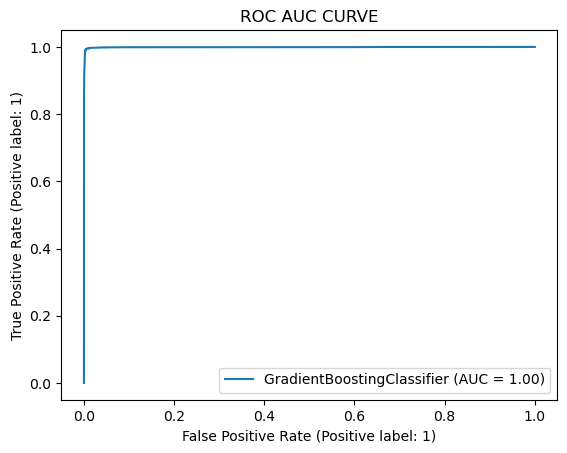





****************************** RandomForestClassifier ******************************
The maximum accuracy score of RandomForestClassifier is 0.9972198581560283 is achieved at 22


Accuracy_Score:  99.64255319148936
Accuracy Score of Model  : 100.0
AUC_Score: 99.64462121345522
Model_with Dataset: 100.0
Cross Validation Score:  99.52793270206669
Precision Score: 99.7250934682208


Confusion matrix: 

[[8493   25]
 [  38 9069]]


Classification Report:
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8518
           1       1.00      1.00      1.00      9107

    accuracy                           1.00     17625
   macro avg       1.00      1.00      1.00     17625
weighted avg       1.00      1.00      1.00     17625



<Figure size 500x500 with 0 Axes>

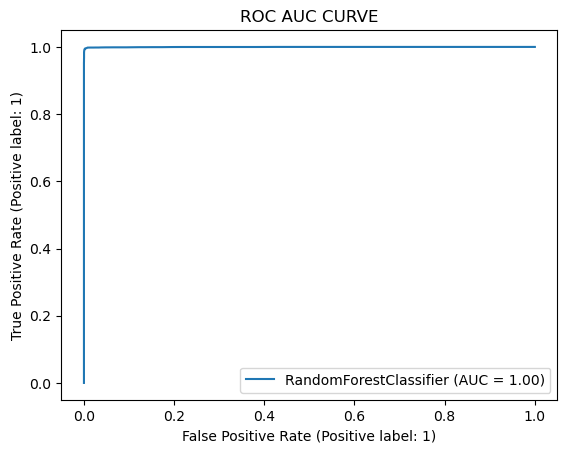

In [17]:
# Creating empty lists
Model = []
Acc_score = []
Model_score=[]
cvs = []
Precision_Score=[]
Roc_score=[]

for name,model in models:
    print("******************************",name,"******************************")
    # Determining Best Random State
    
    max_score=0
    for r_state in range (20,40):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.40)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        acc_score=accuracy_score(y_test,pred)
        if acc_score>max_score:
            max_score=acc_score
            final_r_state=r_state
    print("The maximum accuracy score of", name ,"is", max_score, "is achieved at", final_r_state)
    print("\n")
    
    #Model.append(name)
    Model.append(name)
    model.fit(x_train,y_train)
    
    #print(model)
    y_pred=model.predict(x_test)
    
    # Accuracy Score
    acc_score=accuracy_score(y_test,y_pred)*100
    print('Accuracy_Score: ',acc_score)
    Acc_score.append(acc_score)
    
    #trainning score
    pred_train=model.predict(x_train)
    print(f"Accuracy Score of Model  : {(accuracy_score(y_train,pred_train)*100)}")
    
    #roc_score
    auc_score=roc_auc_score(y_test,y_pred)*100
    print('AUC_Score:',auc_score)
    Roc_score.append(auc_score)
        
    #model working with dataset
    dataset_score=model.score(x_train,y_train)*100
    print('Model_with Dataset:',dataset_score)
    Model_score.append(dataset_score)
    
    # Cross Validation Score
    cv=cross_val_score(model,x,y,cv=5,scoring='accuracy').mean()*100
    print('Cross Validation Score: ',cv)
    cvs.append(cv)
    
    #Pricision Score
    print('Precision Score:', precision_score(y_test,y_pred)*100)
    pre_score=precision_score(y_test,y_pred)*100
    Precision_Score.append(pre_score)
    print('\n')
    
    # Confusion Matrix
    print('Confusion matrix: \n')
    cm=confusion_matrix(y_test,y_pred)
    print(cm)
    print("\n")
    
    # Classification Report
    print('Classification Report:\n ')
    print(classification_report(y_test,y_pred))
    
    #roc_curve
    plt.figure(figsize=(5,5))
    plot_roc_curve(model,x_test,y_test)
    plt.title('ROC AUC CURVE')
    plt.show()
    print('\n')
    print('\n')

In [18]:
# Displaying Scores and metrics:
Results=pd.DataFrame({'Model': Model,'Accuracy Score': Acc_score,'Dataset_score':Model_score,'Precision':Precision_Score,
                      'Roc_Score':Roc_score,'Cross Validation Score':cvs}) 
Results

,Model,Accuracy Score,Dataset_score,Precision,Roc_Score,Cross Validation Score
0,LogisticRegression,99.234043,99.602829,99.329228,99.235654,98.801680
1,MultinomialNB,93.390071,93.698226,93.956166,93.396538,90.912729
2,GaussianNB,90.939007,91.564852,90.220651,90.885408,86.807220
3,Bernoulli,96.096454,96.255248,96.111294,96.087914,94.105944
4,DecisionTreeClassifier,99.245390,100.000000,99.210353,99.242458,99.001415
5,KneighborsClassifier,86.751773,90.993683,86.361684,86.698048,80.386877
6,AdaBoostClassifier,99.432624,99.523395,99.570721,99.436166,99.264669
7,GradientBoostingClassifier,99.392908,99.769263,99.581313,99.398113,99.341830
8,RandomForestClassifier,99.642553,100.000000,99.725093,99.644621,99.527933


Here in modelling 2 model give best score 1. Random Forest Classifier 2.Ada Boost Classifier

In Random forest classifier model give accuracy is 99.64% and Dataset_score is 100% and Precision score is 99.72% and Roc_score is 99.64% and Roc_curve score is 99.64%and cv score of model is 99.52%. and here avg of model give by 1.00% and recall in this model is 1.00 it is highest among all the models

As we see that in Results Ada Boost Classifier model give accuracy is 99.43%% and Dataset_score is 99.52% and Precision score is 99.57% and Roc_score is 99.432% and Roc_curve score is 1.00 and cv score of model is 99.34%. in avg of model is 99% and recall in it is 99%.

Here Some other model give accuracy and preciosn score in good manner like AdaBoost Classifier, GradientBoosting Classifier and Decision Tree classifier so we combined these model and perform with in one model that is Voting_Classifier for check which model give best accuracy and output.

Now we perform some other model for finding best accuracy.

# Voting Classifier With Soft Voting

In [19]:
from sklearn.ensemble import VotingClassifier

In [22]:
voting=VotingClassifier(estimators=[('AD',AD),('GR',GR),('DT',DTC)],voting='soft')
voting.fit(x_train,y_train)
y_pred=voting.predict(x_test)
print(f"Accuracy Score   : {(accuracy_score(y_test,y_pred)*100)}")  #accuracy score
print(f"Dataset Score : {(voting.score(x_train,y_train))*100}")   #dataset score
print(f"Precision_score:{(precision_score(y_test,y_pred))*100}")  #precision score
print(f"Auc_score:{roc_auc_score(y_test,y_pred)*100}")   #auc score
print(f"Recall_score:{recall_score(y_test,y_pred)*100}")   #recall score

Accuracy Score   : 99.39290780141845
Dataset Score : 99.97352195786209
Precision_score:99.46142009232798
Auc_score:99.39393742903658
Recall_score:99.36312726474141


In voting classifier when voting is soft then we got gighest accuray, precision, and auc_score in all the predicted models,
now we try change viting soft to hard for better results

# Voting Classifier With Hsrd Voting

In [86]:
voting_hard=VotingClassifier(estimators=[('AD',AD),('GR',GR),('DT',DTC)],voting='hard')
voting_hard.fit(x_train,y_train)
y_pred=voting_hard.predict(x_test)
print(f"Accuracy Score   : {(accuracy_score(y_test,y_pred)*100)}")  #accuracy score
print(f"Dataset Score : {(voting_hard.score(x_train,y_train))*100}")   #dataset score
print(f"Precision_score:{(precision_score(y_test,y_pred))*100}")  #precision score
print(f"Auc_score:{roc_auc_score(y_test,y_pred)*100}")   #auc score
print(f"Recall_score:{recall_score(y_test,y_pred)*100}")   #recall score

Accuracy Score   : 99.5290780141844
Dataset Score : 99.8033059726898
Precision_score:99.7135301895108
Auc_score:99.53443592912862
Recall_score:99.37410782914242


WE got highest accuracy and precion score compare to when voting is soft, Now we compare this model and hypertuning of random forest to choose right model

# HyperTuning Of Random forest Classifier

In [73]:
dict1={'criterion':['gini','entropy','log_loss'],'max_features':['sqrt','log2','None'],'n_estimators':[100,200,300,400,500],
      'max_depth':[3,4,5,6,7]}

In [25]:
Gs=GridSearchCV(RF,dict1,cv=5, verbose=1, n_jobs=1)
Gs.fit(x,y)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['sqrt', 'log2', 'None'],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=1)

In [27]:
Gs.best_score_

0.9826831818365134

In [29]:
Gs.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 500}

In [88]:
Rfc=RandomForestClassifier(criterion='entropy',max_features='sqrt',n_estimators=500,max_depth=6,n_jobs=1)
Rfc.fit(x_train,y_train)
pred_test=Rfc.predict(x_test)
print(f"Confusion Matrix : {confusion_matrix(y_test,pred_test)}")
print(f"Classification Report : {classification_report(y_test,pred_test)}")
print(f"Accuracy Score of Model  : {(accuracy_score(y_test,pred_test)*100)}")  #accuracy score of testing data
print(f"Dataset Score : {(Rfc.score(x_train,y_train))*100}")    #model working with dataset
print('Precision Score:', precision_score(y_test,pred_test)*100)   #precision score for how accurate our prediction
print(f"Recall_score:{recall_score(y_test,pred_test)*100}")   #recall score

Confusion Matrix : [[8413  105]
 [ 174 8933]]
Classification Report :               precision    recall  f1-score   support

           0       0.98      0.99      0.98      8518
           1       0.99      0.98      0.98      9107

    accuracy                           0.98     17625
   macro avg       0.98      0.98      0.98     17625
weighted avg       0.98      0.98      0.98     17625

Accuracy Score of Model  : 98.41702127659573
Dataset Score : 98.66853273820782
Precision Score: 98.83823854835141
Recall_score:98.08938179422422


Here we seen that these accuracy is less than voting hard accuracy 

# Save Best Model

In [77]:
import joblib

In [89]:
joblib.dump(voting_hard,'fraud_news.pkl')   #save best model

['fraud_news.pkl']

In [83]:
joblib.dump(tfid,'fake_vectorize.pkl')   #save vectorize 

['fake_vectorize.pkl']

In [82]:
joblib.dump(text_nlp,'text_processing.pkl')    #save text_processing

['text_processing.pkl']

In [90]:
# loading the final model
model = joblib.load('fraud_news.pkl')
vector=joblib.load('fake_vectorize.pkl')
# Creating dataframe for predicted results
prediction=pd.DataFrame([model.predict(x)[:]],index=["Predicted"])
prediction.T

,Predicted
0,1
1,1
2,1
3,1
4,1
...,...
44057,0
44058,0
44059,0
44060,0


# Finally we predicted our model